Shivangi Kochrekar
<br> A 2018130020

##Experiment 7

**Objective**: Separating Spam From Ham

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Spam_ham/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
#How many emails are in the dataset?
len(df)

5728

In [5]:
#How many of the emails are spam? 
len(df[df['spam'] == 1])

1368

In [6]:
#Which word appears at the beginning of every email in the dataset? 
#Respond as a lower-case word with punctuation removed.
for i in range(len(df)):
  print(df['text'][i].split(' ')[0][:-1].lower())

Streaming output truncated to the last 5000 lines.
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subje

In [7]:
df['text'][3][8:].strip()

'4 color printing special  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .'

In [8]:
# How many characters are in the longest email in the dataset 
# where longest is measured in terms of the maximum number of characters)?
max_idx = 0
max_len = len(df['text'][0])
for i in range(len(df)):
  if(len(df["text"][i]) > max_len):
    max_idx = i
    max_len = len(df["text"][i])
max_len

43952

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(len(stopwords.words('english')))

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
179


In [10]:
#Build a new corpus variable called corpus
corpus = df.copy()

In [11]:
#convert the text to lowercase. 
for i in range(len(corpus)):
  corpus['text'][i] = corpus['text'][i].lower()
corpus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [12]:
import re
for i in range(len(corpus)):
  corpus["text"][i] = re.sub(r'[^\w\s]', '', corpus["text"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
corpus.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is...,1
2,subject unbelievable new homes made easy im w...,1
3,subject 4 color printing special request addi...,1
4,subject do not have money get software cds fr...,1


In [14]:
for i in range(len(corpus)):
  corpus['text'][i] = word_tokenize(corpus['text'][i])
  corpus["text"][i] = [w for w in corpus["text"][i] if not w.lower() in stop_words]

corpus.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1


In [15]:
for i in range(len(corpus)):
  corpus['text'][i] = corpus['text'][i][1:]

corpus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


In [16]:
ps = PorterStemmer()
 
for i in range(len(corpus)):
  for w in corpus['text'][i]:
    ps.stem(w)

In [17]:
corpus.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


In [18]:
for i in range(len(corpus)):
  corpus['text'][i] = " ".join(corpus['text'][i])

corpus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


In [19]:
sample ={}
for i in range(len(corpus)):
  sample[i] = corpus['text'][i]
 
sample

{0: 'naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget 100 satisfaction guaranteed provide unlimited amount changes extra fees surethat love result collaboration look portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ interes

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

df1 = pd.DataFrame(sample, index=[0]) 

# Initialize
vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(df1.iloc[0])
 
# Create dataFrame
dtm = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
 
# Change column headers
dtm.columns = df1.columns
print(dtm)

          0     1     2     3     4     5     6     7         8     9     ...  \
00         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
000        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.070585   0.0  ...   
0000       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
000000     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
00000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...       ...   ...  ...   
zymg       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
zzmacmac   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
zzn        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
zzncacst   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   
zzzz       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  ...   

              5718  5719  5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

df1 = pd.DataFrame(sample, index=[0]) 

# Initialize
vectorizer = TfidfVectorizer(max_features=20000)
doc_vec = vectorizer.fit_transform(df1.iloc[0])

# Create dataFrame
spdtm = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
 
# Change column headers
spdtm.columns = df1.columns

spdtm = spdtm.T
print(spdtm)

            00  000  0000  00000000  000000000003619  000000000005820  \
0     0.000000  0.0   0.0       0.0              0.0              0.0   
1     0.000000  0.0   0.0       0.0              0.0              0.0   
2     0.000000  0.0   0.0       0.0              0.0              0.0   
3     0.000000  0.0   0.0       0.0              0.0              0.0   
4     0.000000  0.0   0.0       0.0              0.0              0.0   
...        ...  ...   ...       ...              ...              ...   
5723  0.000000  0.0   0.0       0.0              0.0              0.0   
5724  0.032251  0.0   0.0       0.0              0.0              0.0   
5725  0.118669  0.0   0.0       0.0              0.0              0.0   
5726  0.000000  0.0   0.0       0.0              0.0              0.0   
5727  0.000000  0.0   0.0       0.0              0.0              0.0   

      000000000006452  000000000007494  000000000007876  000000000011185  ...  \
0                 0.0              0.0    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
emailsSparse = pd.DataFrame(np.array(spdtm))

In [23]:
len(corpus)

5728

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

X_train, X_test, y_train, y_test = train_test_split(spdtm,corpus['spam'], test_size=0.3)

In [28]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
THRESHOLD = 0.5
y_pred = np.where(cart.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)
accuracy_cart = accuracy_score(y_test, y_pred)
print(accuracy_cart)

0.9668411867364747


In [29]:
cm = confusion_matrix(y_test, y_pred)

In [30]:
specificity_cart = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (CART): ', round(specificity_cart, 4), "%")

Specificity (CART):  97.4771 %


In [31]:
sensitivity_cart = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (CART): ', round(sensitivity_cart, 4), "%")

Sensitivity (CART):  94.1606 %


In [32]:
roc_auc_score(y_test, cart.predict(X_test))

#What is the testing set AUC of spamCART?

0.9581882408089466

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1308
           1       0.92      0.94      0.93       411

    accuracy                           0.97      1719
   macro avg       0.95      0.96      0.95      1719
weighted avg       0.97      0.97      0.97      1719



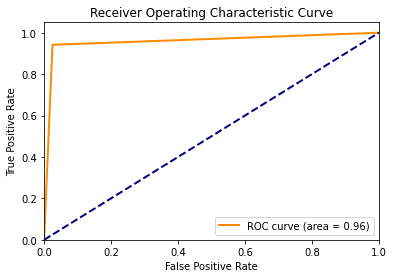

In [34]:
y_prob = cart.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(cart.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc_cart = auc(fpr, tpr)

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_cart,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
THRESHOLD = 0.5
y_pred = np.where(clf.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)
accuracy_lr = accuracy_score(y_test, y_pred)
print(accuracy_lr)

0.9790575916230366


In [36]:
cm = confusion_matrix(y_test, y_pred)

In [37]:
specificity_lr = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (LR): ', round(specificity_lr, 4), "%")

Specificity (LR):  99.9235 %


In [38]:
sensitivity_lr = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (LR): ', round(sensitivity_lr, 4), "%")

Sensitivity (LR):  91.4842 %


In [39]:
roc_auc_score(y_test, clf.predict(X_test))

0.9570386615772674

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1308
           1       1.00      0.91      0.95       411

    accuracy                           0.98      1719
   macro avg       0.99      0.96      0.97      1719
weighted avg       0.98      0.98      0.98      1719



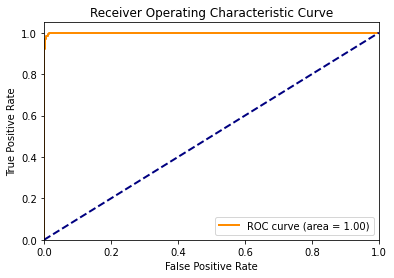

In [41]:
y_prob = clf.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(clf.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc_clf = auc(fpr, tpr)

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_clf,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [42]:
spamRF = RandomForestClassifier()
spamRF.fit(X_train, y_train)
THRESHOLD = 0.5
y_pred = np.where(spamRF.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)

0.9842931937172775


In [43]:
cm = confusion_matrix(y_test, y_pred)

In [44]:
specificity_RF = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (RF): ', round(specificity_RF, 4), "%")

Specificity (RF):  99.3884 %


In [45]:
sensitivity_RF = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (RF): ', round(sensitivity_RF, 4), "%")

Sensitivity (RF):  95.3771 %


In [46]:
roc_auc_score(y_test, spamRF.predict(X_test))

#Which model had the best testing set performance, in terms of accuracy and AUC? - CART or Random Forest
#Random Forest has the best testing performance compared to CART in terms of accuracy and AUC.

0.9738275407933212

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1308
           1       0.98      0.95      0.97       411

    accuracy                           0.98      1719
   macro avg       0.98      0.97      0.98      1719
weighted avg       0.98      0.98      0.98      1719



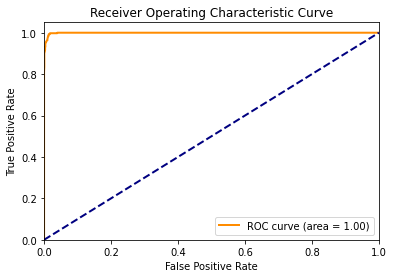

In [48]:
y_prob = spamRF.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(spamRF.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc_spamRF = auc(fpr, tpr)

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_spamRF,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [50]:
results_table = PrettyTable(['Model','Accuracy (%)', 'Specificity (%)', 'Sensitivity (%)', "Area Under Curve(AUC)"])
results_table.add_row(['Random Forest', round(accuracy_rf, 4),  round(specificity_RF, 4), round(sensitivity_RF, 4), round(roc_auc_spamRF,4) ])
results_table.add_row(['CART', round(accuracy_cart, 4), round(specificity_cart, 4), round(sensitivity_cart, 4), round(roc_auc_cart,4) ])
results_table.add_row(['Logistic Regression', round(accuracy_lr, 4), round(specificity_lr, 4), round(sensitivity_lr, 4), round(roc_auc_clf,4) ])

print(results_table)

+---------------------+--------------+-----------------+-----------------+-----------------------+
|        Model        | Accuracy (%) | Specificity (%) | Sensitivity (%) | Area Under Curve(AUC) |
+---------------------+--------------+-----------------+-----------------+-----------------------+
|    Random Forest    |    0.9843    |     99.3884     |     95.3771     |         0.9992        |
|         CART        |    0.9668    |     97.4771     |     94.1606     |         0.9582        |
| Logistic Regression |    0.9791    |     99.9235     |     91.4842     |         0.9994        |
+---------------------+--------------+-----------------+-----------------+-----------------------+


###Conclusion:

  The email dataset had uneven class distribution with 1368 spam emails and 4360 ham emails. In this experiment, I performed text analysis for separating spam email from ham. A spam classifier can potentially benefit from including the frequency of the word that appears in every email. Random Forest model outperformed CART model in terms of Accuracy and AUC. This is because Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees.